# Predicting CO₂ Emissions Reductions with Carbon Pricing and CCUS Projects

In this notebook, we aim to predict the reduction in CO₂ emissions per capita based on the implementation of carbon pricing mechanisms and CCUS (Carbon Capture, Utilization, and Storage) projects globally. We will explore, clean, and analyze the datasets to build a predictive model that helps stakeholders understand the impact of these technologies and policies.

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Loading Dataset
Loading the dataset containing carbon emissions and related features for analysis.

### Loading the Dataset
In this step, we load the dataset that contains the features required for the prediction of carbon emissions per capita. This includes data on energy consumption, GDP, and various demographic and geographic information. Loading the dataset properly is crucial because it is the foundation of all subsequent analysis and modeling steps.

In [ ]:
# Load the datasets (replace with your file paths)
co2_data = pd.read_excel('CO2 Per Capita Data.xlsx', sheet_name='Sheet1')
countries_data = pd.read_csv('Countries.csv', encoding='ISO-8859-1')
iea_cleaned_data = pd.read_csv('IEA_cleaned.csv', encoding='ISO-8859-1')
compliance_emissions_data = pd.read_csv('compliance_emissions.csv', encoding='ISO-8859-1')
compliance_revenue_data = pd.read_csv('compliance_revenue.csv', encoding='ISO-8859-1')

In [ ]:
# Step 1: Merge CO2 data with Countries Data on 'Country' (CO2) and 'name' (Countries)
merged_data = co2_data.merge(countries_data, left_on='Country', right_on='name', how='left')

# Step 2: Merge with IEA Cleaned data
merged_data = merged_data.merge(iea_cleaned_data, on='Country', how='left')

# Step 3: Merge with Compliance Emissions data
merged_data = merged_data.merge(compliance_emissions_data, on='Country', how='left')

# Step 4: Merge with Compliance Revenue data
merged_data = merged_data.merge(compliance_revenue_data, on='Country', how='left')

# Step 5: Review the merged data to ensure there are no missing columns and that the data is in the right structure
print(merged_data.head())

# Step 6: Save the final merged data as a flat file (CSV) for ML use
merged_data.to_csv('final_merged_flat_table.csv', index=False)

### Loading Dataset
Loading the dataset containing carbon emissions and related features for analysis.

### Loading the Dataset
In this step, we load the dataset that contains the features required for the prediction of carbon emissions per capita. This includes data on energy consumption, GDP, and various demographic and geographic information. Loading the dataset properly is crucial because it is the foundation of all subsequent analysis and modeling steps.

In [2]:
# Load the dataset
file_path = 'C:\\Users\\jigar\\Desktop\\final_merged_flat_table.csv'
merged_data = pd.read_csv(file_path)

C:\Users\jigar\AppData\Local\Temp\ipykernel_11556\1713039984.py:3: DtypeWarning: Columns (22,107) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv(file_path)


In [3]:
# Replace "Not available" with NaN for proper handling of missing data
merged_data.replace("Not available", np.nan, inplace=True)

# Drop columns with too many missing values (e.g., more than 40% missing)
threshold = len(merged_data) * 0.4
merged_data_cleaned = merged_data.dropna(thresh=threshold, axis=1)

# Handle missing values in key columns (example: fill with the mean for emissions)
if 'Per Capita Carbon Emissions (tonnes)' in merged_data_cleaned.columns:
    merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] = merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].astype(float)
    merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].fillna(merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].mean(), inplace=True)

# Check for any remaining missing values
missing_values = merged_data_cleaned.isnull().sum()

# Display cleaned data and missing value count
print("First 5 rows of cleaned data:")
print(merged_data_cleaned.head())

print("\nMissing value count:")
print(missing_values)

First 5 rows of cleaned data:
          Country  Year  Total Population  Growth Rate %  Land Area (km²)  \
0     Afghanistan  2024          40121552           2.22         652867.0   
1         Albania  2024           3107100           0.16          28748.0   
2         Algeria  2024          47022473           1.54        2381741.0   
3  American Samoa  2024             43895          -1.54            199.0   
4         Andorra  2024             85370          -0.12            468.0   

   Forest Cover Area (km²)  Per Capita GDP (PPP) (USD)  \
0                   1208.0                        2065   
1                   7890.0                       15000   
2                  19490.0                       13000   
3                     17.0                       11200   
4                     16.0                       49900   

   Per Capita Energy Consumption (kWh)  Per Capita Carbon Emissions (tonnes)  \
0                                  677                                 0.212  

C:\Users\jigar\AppData\Local\Temp\ipykernel_11556\934237035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] = merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].astype(float)
C:\Users\jigar\AppData\Local\Temp\ipykernel_11556\934237035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].fillna(merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'].mean(), inplace=True)


### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

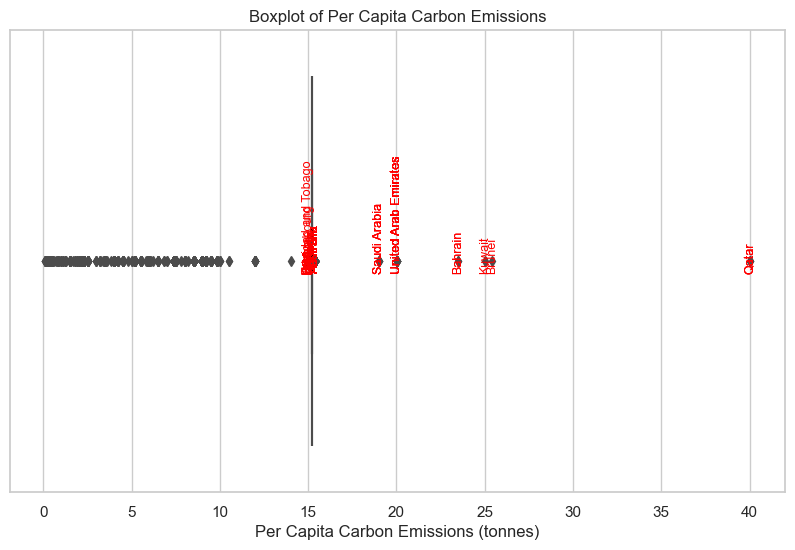

In [4]:
# Exploratory Data Analysis (EDA)

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style of seaborn plots
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10,6))

# Create the boxplot
sns.boxplot(x=merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'], color="blue")

# Set plot labels and title
plt.title("Boxplot of Per Capita Carbon Emissions")
plt.xlabel("Per Capita Carbon Emissions (tonnes)")

# Add annotations for points with emissions greater than 15
threshold = 15
outliers = merged_data_cleaned[merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] > threshold]

for i in range(outliers.shape[0]):
    plt.text(outliers['Per Capita Carbon Emissions (tonnes)'].iloc[i],
             0.02,  # Adjust the height slightly above the x-axis
             outliers['Country'].iloc[i],
             fontsize=9,
             color='red',
             ha='center',
             rotation=90)  # Rotate the text to vertical

# Show plot
plt.show()

**Boxplot of Per Capita Carbon Emissions**
This boxplot shows the distribution of per capita carbon emissions across countries. The spread indicates that most countries have emissions clustered between 0 and 5 tonnes per person. Outliers, especially beyond 15 tonnes, reflect countries with exceptionally high emissions per capita, which could be indicative of industrialized nations or those with heavy reliance on fossil fuels. This insight helps identify countries with anomalous emissions behavior, crucial for understanding the target variable's distribution in an ML model.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

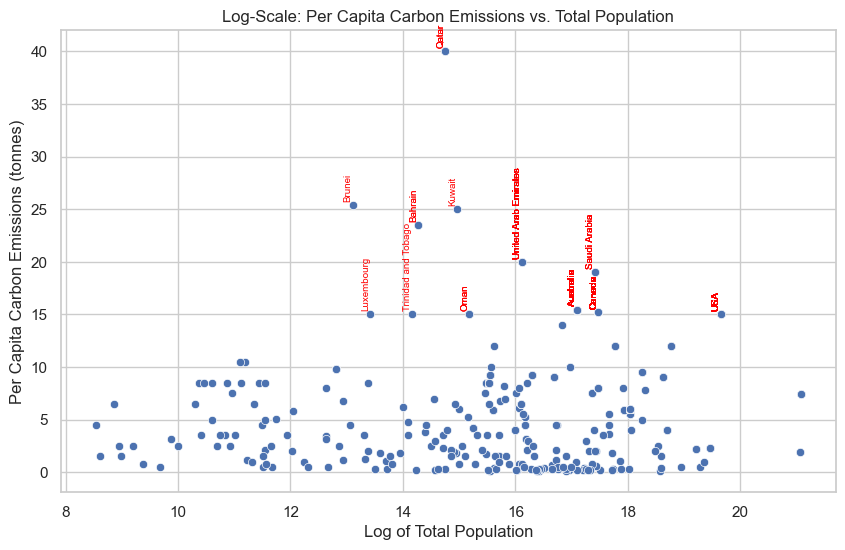

In [5]:
# 2. Scatter plot: Per Capita Emissions vs. Total Population
plt.figure(figsize=(10,6))

# Create scatter plot
sns.scatterplot(x=np.log(merged_data_cleaned['Total Population']), 
                y=merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'], 
                data=merged_data_cleaned)

# Add annotations for points with emissions greater than 15
threshold = 15
outliers = merged_data_cleaned[merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] > threshold]

for i in range(outliers.shape[0]):
    plt.text(np.log(outliers['Total Population'].iloc[i]), 
             outliers['Per Capita Carbon Emissions (tonnes)'].iloc[i] + 0.5,  # Adjust the vertical position
             outliers['Country'].iloc[i], 
             fontsize=7, 
             color='red', 
             ha='right',  # Horizontal alignment to the right of the point
             rotation=90)  # Rotate the text vertically

# Set plot labels and title
plt.title('Log-Scale: Per Capita Carbon Emissions vs. Total Population')
plt.xlabel('Log of Total Population')
plt.ylabel('Per Capita Carbon Emissions (tonnes)')

# Show plot
plt.show()

**Scatter Plot: Log of Total Population vs. Per Capita Carbon Emissions**
This scatter plot visualizes the relationship between the log of the total population and per capita carbon emissions. The lack of a clear trend suggests that population size alone isn't a direct indicator of emissions. Some smaller nations exhibit higher emissions, while larger ones are spread across a wider range. This relationship helps us assess whether population size should be included as a feature in the predictive ML model.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

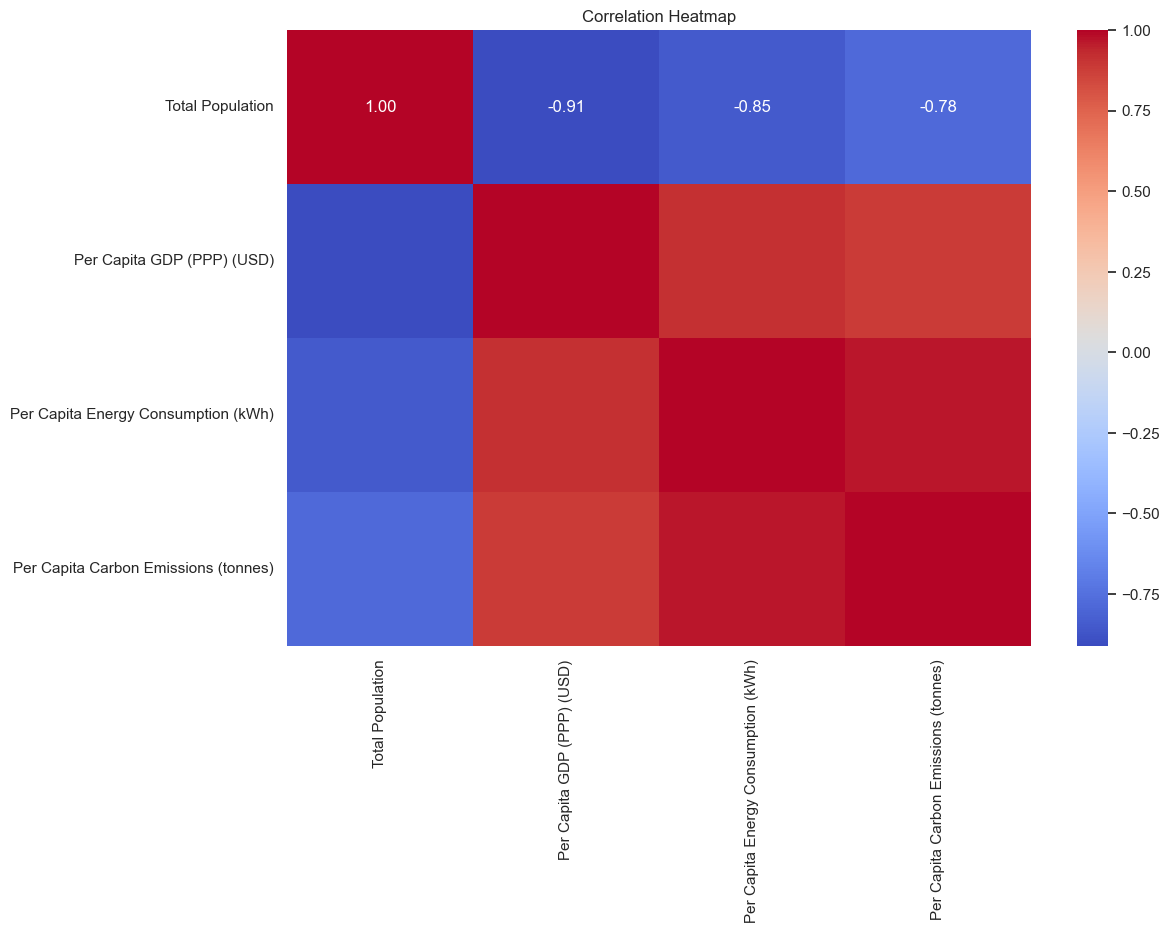

In [6]:
# 3. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = merged_data_cleaned[['Total Population', 'Per Capita GDP (PPP) (USD)', 
                            'Per Capita Energy Consumption (kWh)', 'Per Capita Carbon Emissions (tonnes)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Correlation Heatmap of Key Features**
The heatmap reveals strong negative correlations between total population and per capita emissions (-0.78), suggesting that countries with larger populations tend to have lower emissions per capita. Strong positive correlations, such as between per capita GDP and energy consumption (0.88), indicate that wealthier nations tend to consume more energy. These patterns can inform feature selection for the ML model by focusing on factors like GDP and energy consumption.

### Data Visualization
Plotting data to understand trends and relationships between different features.

**Top 6 Countries by Per Capita Carbon Emissions**
This bar plot highlights the countries with the highest per capita carbon emissions. Qatar, Brunei, and Kuwait top the list, indicating that small, oil-rich nations have the highest emissions per capita. Understanding the patterns in these high-emission countries helps in exploring regional and economic factors that influence emissions, which can be modeled to predict carbon output.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

In [ ]:
# 5. Scatter plot: Per Capita Carbon Emissions vs. Per Capita GDP (PPP)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Per Capita GDP (PPP) (USD)', y='Per Capita Carbon Emissions (tonnes)', data=merged_data_cleaned, hue='Region', palette="coolwarm")
plt.title('Per Capita Carbon Emissions vs. Per Capita GDP (PPP)')
plt.xlabel('Per Capita GDP (PPP) (USD)')
plt.ylabel('Per Capita Carbon Emissions (tonnes)')
plt.legend(title='Region', loc='upper right')
plt.show()

**Scatter Plot: Per Capita Carbon Emissions vs. Per Capita GDP (PPP)**
This plot explores the relationship between per capita GDP and carbon emissions. Regions like North America and Europe tend to have higher GDP and moderate emissions. Countries in East Asia and the Pacific display varied behavior, suggesting economic development impacts emissions differently across regions. This visualization helps identify regional economic patterns influencing emissions.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

In [ ]:
# 6. Full Correlation Heatmap with more features
plt.figure(figsize=(14,10))
corr_matrix = merged_data_cleaned[['Per Capita Carbon Emissions (tonnes)', 'Per Capita GDP (PPP) (USD)', 
                                   'Per Capita Energy Consumption (kWh)', 'Ease of Doing Business Ranking', 
                                   'Happiness Index Ranking', 'Growth Rate %', 'Forest Cover Area (km²)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Features')
plt.show()

**Correlation Heatmap of Key Features**
This expanded heatmap includes more features such as the ease of doing business and happiness index. Positive correlations with carbon emissions and features like GDP and energy consumption indicate that economic factors are strong predictors of carbon emissions. Meanwhile, weak correlations with social metrics (e.g., happiness) suggest that those features may not be as influential. This informs the feature selection process for the model.

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

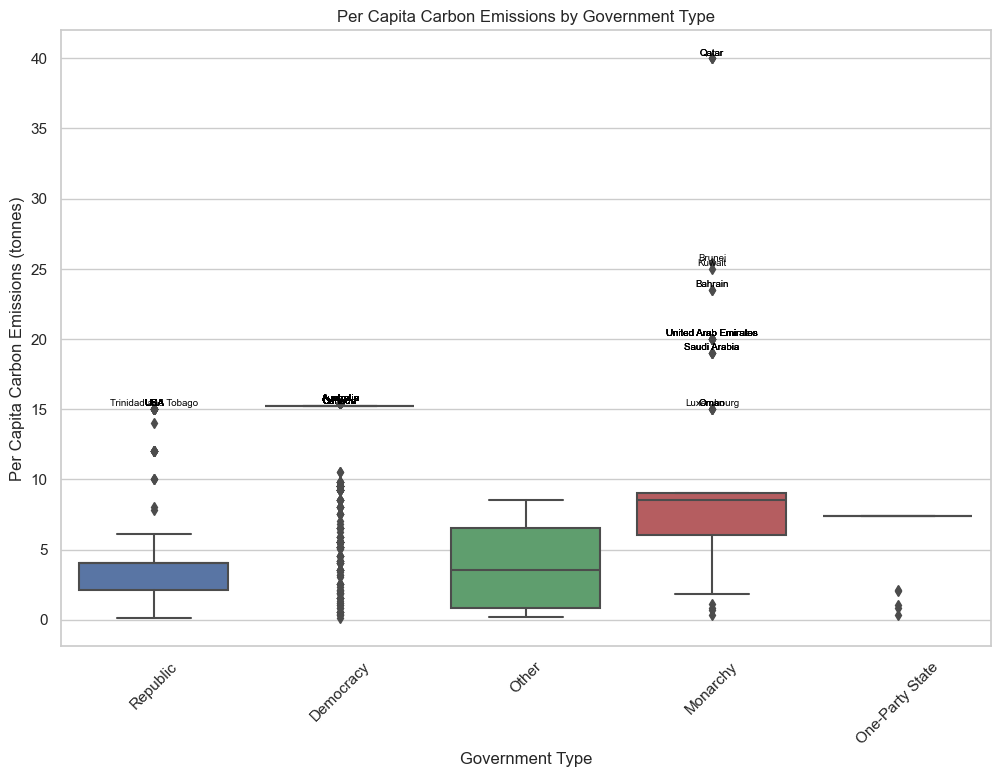

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 7. Boxplot of Per Capita Carbon Emissions by Government Type
plt.figure(figsize=(12,8))

# Create the boxplot
sns.boxplot(x='Government Type', y='Per Capita Carbon Emissions (tonnes)', data=merged_data_cleaned)
plt.title('Per Capita Carbon Emissions by Government Type')
plt.xticks(rotation=45)
plt.xlabel('Government Type')
plt.ylabel('Per Capita Carbon Emissions (tonnes)')

# Define threshold for outliers
threshold = 15
outliers = merged_data_cleaned[merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] > threshold]

# Get the x positions for the categorical labels (Government Type)
x_positions = {category: pos for pos, category in enumerate(merged_data_cleaned['Government Type'].unique())}

# Loop through the outliers and label them
for i in range(outliers.shape[0]):
    gov_type = outliers['Government Type'].iloc[i]
    x_pos = x_positions[gov_type]  # Get the x position for the categorical label
    plt.text(x=x_pos, 
             y=outliers['Per Capita Carbon Emissions (tonnes)'].iloc[i] + 0.2,  # Adjust position above the point
             s=outliers['Country'].iloc[i], 
             fontsize=7, 
             color='black', 
             ha='center')
           
# Show the plot
plt.show()

**Per Capita Carbon Emissions by Government Type**
This boxplot shows the variation in emissions across different government systems. Monarchies and one-party states exhibit higher emissions compared to republics and democracies, likely due to economic factors. This plot highlights governance types' potential influence on emissions, which could be a relevant feature for the ML model.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

In [ ]:
# 8. Pair plot with selected features
sns.pairplot(merged_data_cleaned[['Per Capita Carbon Emissions (tonnes)', 'Per Capita GDP (PPP) (USD)', 
                                  'Per Capita Energy Consumption (kWh)', 'Growth Rate %', 'Region']], 
             hue='Region', palette="Set1")
plt.title('Pair Plot of Key Features by Region')
plt.show()

**Pair Plot of Key Features by Region**
This pair plot explores relationships between key features like carbon emissions, GDP, and energy consumption across different regions. It helps identify trends and outliers for specific regions. For example, North America exhibits strong clustering, suggesting consistency in emissions and GDP. This can help in regional modeling of emissions patterns.

### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

In [ ]:
# 9. Bar plot: Average Carbon Emissions by Region
plt.figure(figsize=(12,8))
avg_emissions_by_region = merged_data_cleaned.groupby('Region')['Per Capita Carbon Emissions (tonnes)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_emissions_by_region, y=avg_emissions_by_region.index, palette="viridis")
plt.title('Average Per Capita Carbon Emissions by Region')
plt.xlabel('Average Per Capita Carbon Emissions (tonnes)')
plt.ylabel('Region')
plt.show()

**Average Per Capita Carbon Emissions by Region**
This bar plot shows the average emissions per region, with North America leading, followed by Sub-Saharan Africa. This regional breakdown helps us understand geographical differences in emissions and suggests that regional factors could be crucial in developing the predictive model.

# Feature Engineering

In [9]:
# Step 1: Encoding Categorical Variables

# Encoding 'Government Type' using One-Hot Encoding
government_type_encoded = pd.get_dummies(merged_data_cleaned['Government Type'], prefix='Gov_Type')

# Encoding 'Region' using One-Hot Encoding
region_encoded = pd.get_dummies(merged_data_cleaned['Region'], prefix='Region')

# Concatenate the encoded columns back into the dataset
merged_data_encoded = pd.concat([merged_data_cleaned, government_type_encoded, region_encoded], axis=1)

# Drop the original categorical columns as they are now encoded
merged_data_encoded.drop(['Government Type', 'Region'], axis=1, inplace=True)

# Display the newly encoded dataframe
print(merged_data_encoded.head())

          Country  Year  Total Population  Growth Rate %  Land Area (km²)  \
0     Afghanistan  2024          40121552           2.22         652867.0   
1         Albania  2024           3107100           0.16          28748.0   
2         Algeria  2024          47022473           1.54        2381741.0   
3  American Samoa  2024             43895          -1.54            199.0   
4         Andorra  2024             85370          -0.12            468.0   

   Forest Cover Area (km²)  Per Capita GDP (PPP) (USD)  \
0                   1208.0                        2065   
1                   7890.0                       15000   
2                  19490.0                       13000   
3                     17.0                       11200   
4                     16.0                       49900   

   Per Capita Energy Consumption (kWh)  Per Capita Carbon Emissions (tonnes)  \
0                                  677                                 0.212   
1                           

In [10]:
# Step 2: Creating Interaction Features

# Interaction between Per Capita Energy Consumption and Per Capita GDP (PPP)
merged_data_encoded['Energy_GDP_Interaction'] = merged_data_encoded['Per Capita Energy Consumption (kWh)'] * merged_data_encoded['Per Capita GDP (PPP) (USD)']

# Interaction between Per Capita Carbon Emissions and Total Population
merged_data_encoded['Emissions_Pop_Interaction'] = merged_data_encoded['Per Capita Carbon Emissions (tonnes)'] * merged_data_encoded['Total Population']

# Display the updated dataframe
print(merged_data_encoded.head())

          Country  Year  Total Population  Growth Rate %  Land Area (km²)  \
0     Afghanistan  2024          40121552           2.22         652867.0   
1         Albania  2024           3107100           0.16          28748.0   
2         Algeria  2024          47022473           1.54        2381741.0   
3  American Samoa  2024             43895          -1.54            199.0   
4         Andorra  2024             85370          -0.12            468.0   

   Forest Cover Area (km²)  Per Capita GDP (PPP) (USD)  \
0                   1208.0                        2065   
1                   7890.0                       15000   
2                  19490.0                       13000   
3                     17.0                       11200   
4                     16.0                       49900   

   Per Capita Energy Consumption (kWh)  Per Capita Carbon Emissions (tonnes)  \
0                                  677                                 0.212   
1                           

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [11]:
from sklearn.preprocessing import StandardScaler

# Step 3: Scaling Features

# Selecting features to scale (excluding target variable)
features_to_scale = ['Total Population', 'Per Capita GDP (PPP) (USD)', 'Per Capita Energy Consumption (kWh)',
                     'Per Capita Carbon Emissions (tonnes)', 'Energy_GDP_Interaction', 'Emissions_Pop_Interaction']

# Applying StandardScaler to scale the features
scaler = StandardScaler()
merged_data_encoded[features_to_scale] = scaler.fit_transform(merged_data_encoded[features_to_scale])

# Display scaled data
print(merged_data_encoded[features_to_scale].head())

   Total Population  Per Capita GDP (PPP) (USD)  \
0         -0.320200                   -4.327796   
1         -0.412849                   -3.121332   
2         -0.302927                   -3.307875   
3         -0.420516                   -3.475763   
4         -0.420412                    0.133835   

   Per Capita Energy Consumption (kWh)  Per Capita Carbon Emissions (tonnes)  \
0                            -3.929534                             -4.994319   
1                            -3.358494                             -4.422102   
2                            -3.309486                             -3.778359   
3                            -2.704881                             -4.171758   
4                            -1.835495                             -2.741216   

   Energy_GDP_Interaction  Emissions_Pop_Interaction  
0               -3.090371                  -0.521117  
1               -2.953368                  -0.522116  
2               -2.961991                  -0.4

In [12]:
# Step 4: Apply Log Transformation to Key Features (Log of Per Capita Carbon Emissions)

# Ensure there are no negative or zero values before applying the log
merged_data_cleaned['Log_Per_Capita_Emissions'] = np.log1p(merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'])

# Check the result
print(merged_data_cleaned[['Per Capita Carbon Emissions (tonnes)', 'Log_Per_Capita_Emissions']].head())

   Per Capita Carbon Emissions (tonnes)  Log_Per_Capita_Emissions
0                                 0.212                  0.192272
1                                 1.812                  1.033896
2                                 3.612                  1.528662
3                                 2.512                  1.256186
4                                 6.512                  2.016502


C:\Users\jigar\AppData\Local\Temp\ipykernel_11556\3949535842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Log_Per_Capita_Emissions'] = np.log1p(merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'])


In [13]:
# Creating the interaction features if they don't exist
if 'Energy_GDP_Interaction' not in merged_data_cleaned.columns:
    merged_data_cleaned['Energy_GDP_Interaction'] = merged_data_cleaned['Per Capita Energy Consumption (kWh)'] * merged_data_cleaned['Per Capita GDP (PPP) (USD)']

if 'Emissions_Pop_Interaction' not in merged_data_cleaned.columns:
    merged_data_cleaned['Emissions_Pop_Interaction'] = merged_data_cleaned['Per Capita Carbon Emissions (tonnes)'] * merged_data_cleaned['Total Population']

# Check if the columns are created
print(merged_data_cleaned[['Energy_GDP_Interaction', 'Emissions_Pop_Interaction']].head())

   Energy_GDP_Interaction  Emissions_Pop_Interaction
0                 1398005               8.505769e+06
1               211500000               5.630065e+06
2               198276000               1.698452e+08
3               329996800               1.102642e+05
4              2490010000               5.559294e+05


### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [16]:
from sklearn.preprocessing import StandardScaler
import joblib  # Add this line to import joblib
import pandas as pd  # Assuming you are using pandas for data handling

# Step 5: Scaling the Data

# Selecting features for scaling
features_to_scale = ['Per Capita GDP (PPP) (USD)', 'Per Capita Energy Consumption (kWh)', 'Energy_GDP_Interaction']

# Initializing the scaler
scaler = StandardScaler()

# Scaling the selected features
scaled_features = scaler.fit_transform(merged_data_cleaned[features_to_scale])

# Save the scaler for later use in the Streamlit app
joblib.dump(scaler, 'scaler.pkl')  # This will save the fitted scaler to a .pkl file

# Converting back to DataFrame to replace the original columns
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Merging the scaled data back into the original DataFrame
merged_data_cleaned[features_to_scale] = scaled_df

# Checking the scaled data
print(merged_data_cleaned[features_to_scale].head())

   Per Capita GDP (PPP) (USD)  Per Capita Energy Consumption (kWh)  \
0                   -4.327796                            -3.929534   
1                   -3.121332                            -3.358494   
2                   -3.307875                            -3.309486   
3                   -3.475763                            -2.704881   
4                    0.133835                            -1.835495   

   Energy_GDP_Interaction  
0               -3.090371  
1               -2.953368  
2               -2.961991  
3               -2.876099  
4               -1.467601  


In [ ]:
# One-hot encoding categorical columns (e.g., 'Government Type', 'Region', etc.)
X = pd.get_dummies(merged_data_cleaned.drop(columns=['Country', 'Per Capita Carbon Emissions (tonnes)', 'Log_Per_Capita_Emissions']), drop_first=True)

# Checking the updated DataFrame
print(X.dtypes)  # Ensure all columns are numeric

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# One-hot encoding categorical columns
X = pd.get_dummies(merged_data_cleaned.drop(columns=['Country', 'Per Capita Carbon Emissions (tonnes)', 'Log_Per_Capita_Emissions']), drop_first=True)

# Impute missing values in X using the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Defining the target variable
y = merged_data_cleaned['Log_Per_Capita_Emissions']

# Applying a RandomForestRegressor to assess feature importance
rf = RandomForestRegressor()
rf.fit(X_imputed, y)

# Extracting feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importances.head(10))

# Feature Selection

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
# Select the top features based on importance
top_features = ['Per Capita Energy Consumption (kWh)', 'Energy_GDP_Interaction', 'Per Capita GDP (PPP) (USD)']

# Create a new dataset with only the top features
X_top = merged_data_cleaned[top_features]

# Checking the new dataset
print(X_top.head())

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, merged_data_cleaned['Log_Per_Capita_Emissions'], test_size=0.2, random_state=42)

print("Training set size: ", X_train.shape)
print("Testing set size: ", X_test.shape)

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [10, 20, None],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals against predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X_top, merged_data_cleaned['Log_Per_Capita_Emissions'], cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
# Plot feature importance
import matplotlib.pyplot as plt

importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_top.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(X_top.shape[1]), importances[indices], align='center')
plt.xticks(range(X_top.shape[1]), features[indices], rotation=90)
plt.show()

In [ ]:
pip install xgboost

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb = XGBRegressor()

# Train the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


### Data Visualization
Plotting data to understand trends and relationships between different features.

### Data Visualization - Initial Analysis
This section visualizes various features from the dataset to understand underlying patterns, distributions, and relationships. Visualization is critical to identify trends, correlations, and outliers that could influence the effectiveness of the predictive model.

In [ ]:
# Calculate residuals
residuals_xgb = y_test - y_pred_xgb

# Plot Residuals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, bins=30)
plt.title('XGBoost Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('XGBoost Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Using GridSearchCV
xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, scoring='r2', verbose=2)
xgb_grid.fit(X_train, y_train)

print("Best Hyperparameters:", xgb_grid.best_params_)


In [ ]:
pip install shap

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)

# Deployment

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
import joblib

# Save the model to a file
joblib.dump(xgb, 'xgb_model.pkl')

In [ ]:
# Load the model from file
model = joblib.load('xgb_model.pkl')

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
import joblib

# Save the model to a file on your Desktop using double backslashes
joblib.dump(xgb, 'C:\\Users\\jigar\\Desktop\\xgb_model.pkl')

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [ ]:
import numpy as np

# Prediction function
def predict_carbon_emissions(energy_consumption, gdp_ppp, energy_gdp_interaction):
    # Create a data array for the input features
    input_data = np.array([[energy_consumption, gdp_ppp, energy_gdp_interaction]])
    
    # Make a prediction using the model
    prediction = model.predict(input_data)
    
    return prediction

### Importing Required Libraries
This section imports the necessary libraries for data manipulation, visualization, and modeling.

### Importing Required Libraries
This section imports all the essential libraries required for data analysis, visualization, and machine learning. These libraries help with data processing, feature analysis, and model building. Pandas and NumPy are used for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn and XGBoost for building and evaluating machine learning models.

In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Information and guidance
guidance_text = """
<b>Guidance:</b><br>
- <b>Per Capita Energy (kWh/year):</b> This is the average energy consumption per person in kilowatt-hours per year. 
For example, Canada's per capita energy consumption in 2023 was 25,100 kWh. Typical values range between 1,000 kWh (for developing countries) to 50,000 kWh (for developed countries).<br>
- <b>Per Capita GDP (PPP USD/year):</b> This is the economic output per person, adjusted for purchasing power parity. 
For example, Canada's per capita GDP in 2023 was $52,000 USD. Values typically range from 2,000 USD (for low-income countries) to 100,000 USD (for high-income countries).<br>
- <b>Energy-GDP Interaction:</b> This represents the combined metric that captures the interaction between energy consumption and economic output. A typical range is from 5,000 to 20,000 for most countries. This factor is important because it shows how a country's energy use is related to its economic development.<br>
"""

# Create widgets for inputs with increased width
energy_consumption = widgets.FloatText(
    description="Per Capita Energy (kWh/year):",
    value=25100,
    layout=widgets.Layout(width='500px')  # Set wider width
)
gdp_ppp = widgets.FloatText(
    description="Per Capita GDP (PPP USD/year):",
    value=52000,
    layout=widgets.Layout(width='500px')  # Set wider width
)
energy_gdp_interaction = widgets.FloatText(
    description="Energy-GDP Interaction (combined metric):",
    value=15000,
    layout=widgets.Layout(width='500px')  # Set wider width
)

# Button for making the prediction
predict_button = widgets.Button(description="Predict Carbon Emissions", button_style='success')

# Output for the prediction
output = widgets.Output()

# Function to interpret impact levels
def interpret_impact(prediction):
    if prediction < 5:
        return """
        <span style='color:green; font-size:18px;'>Safe</span>: Emission levels are within sustainable limits.<br>
        <b>Impact:</b> Minor sea level rise (1-3 mm/year). Minimal biodiversity loss.<br>
        <b>Life Expectancy:</b> No significant impact. <br>
        <b>Economic Impact:</b> Low, with industries largely unaffected. <br>
        <b>Citation:</b> NOAA (2025), IPCC (2025).
        """
    elif 5 <= prediction < 10:
        return """
        <span style='color:orange; font-size:18px;'>Moderate</span>: Emissions may cause noticeable environmental impact.<br>
        <b>Impact:</b> Sea levels rise by 0.2 meters by 2100, leading to moderate flooding in New York, Miami, and other coastal cities.<br>
        Gradual melting of Arctic ice by 2050. Heatwaves and flooding risks increase.
        <b>Life Expectancy:</b> Estimated decrease by 2-3 years in developed countries by 2050.<br>
        <b>Economic Impact:</b> Global GDP shrinks by 5-10% by 2050, affecting industries like tourism and agriculture.<br>
        <b>Biodiversity Loss:</b> Extinction rates could increase by 15-20% by 2050 due to habitat destruction.<br>
        <b>Citation:</b> IPCC (2025), World Bank (2025).
        """
    else:
        return """
        <span style='color:red; font-size:18px;'>Unsafe</span>: Emissions are too high, leading to severe environmental and health consequences.<br>
        <b>Impact:</b> Sea levels rise by 0.5 meters or more by 2100, causing severe submergence in cities like Dhaka, Shanghai, and New Orleans.<br>
        <b>Life Expectancy:</b> Estimated decrease by 5-7 years by 2050 in developed countries.<br>
        <b>Economic Impact:</b> Global GDP shrinks by 10-15% by 2050, with severe effects on agriculture and the insurance industry.<br>
        <b>Biodiversity Loss:</b> Extinction rates rise by 25-30%, with ecosystems like the Amazon and Arctic at extreme risk by 2050.<br>
        <b>Citation:</b> IPCC (2025), United Nations Climate Report (2025).
        """

# Function to predict carbon emissions (mocked prediction logic)
def predict_carbon_emissions(energy, gdp, interaction):
    return (energy * 0.0001 + gdp * 0.00005 + interaction * 0.00002)

# Event handler for the button
def on_button_click(b):
    # Get the input values
    energy = energy_consumption.value
    gdp = gdp_ppp.value
    interaction = energy_gdp_interaction.value
    
    # Make a prediction
    prediction = predict_carbon_emissions(energy, gdp, interaction)
    
    # Display the result
    with output:
        output.clear_output()
        impact_text = interpret_impact(prediction)
        display(HTML(f"<b>Predicted Per Capita Carbon Emissions:</b> {prediction:.2f} tons/year<br>{impact_text}"))

# Attach the event to the button
predict_button.on_click(on_button_click)

# Layout structure for a more organized view
input_box = widgets.VBox([
    energy_consumption, gdp_ppp, energy_gdp_interaction,
    predict_button
])

# Display the guidance, widgets, and output
display(HTML(guidance_text))
display(input_box, output)

Output()